##Universidad Autónoma de Chihuahua
##Facultad de Ingeniería
##MIC
###Computer Vision 2024-B
####Dra Graciela Ramírez-Alonso
####Maritrini Velázquez Ruiz 329675

##Ecualización de Histogramas
###Ecualización manual
###Ecualización con OpenCV

In [ ]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/grogu.jpg')

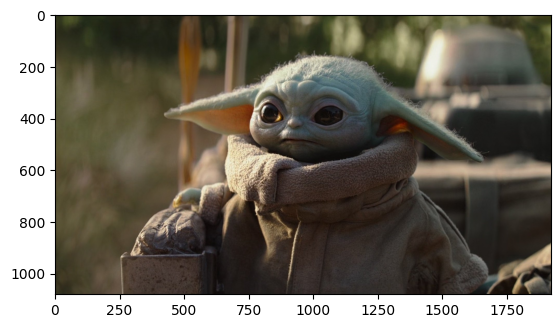

In [ ]:
# display the color image
plt.imshow(img)

In [ ]:
# convertir imagen a numpy array
img = np.asanyarray(img)

In [ ]:
img.shape

(1080, 1920, 3)

In [ ]:
#  RGB to Gray Scale
import cv2
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
img.shape

(1080, 1920)

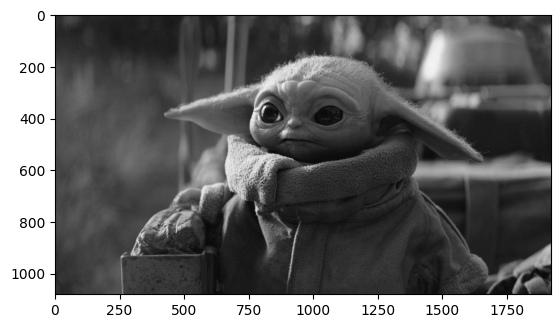

In [ ]:
# display the image
plt.imshow(img, cmap='gray')

In [ ]:
img.max()

252

In [ ]:
img.min()

0

In [ ]:
img.shape

(1080, 1920)

In [ ]:
flat = img.flatten()

In [ ]:
flat.shape

(2073600,)

(array([8.30000e+01, 2.17100e+03, 2.02510e+04, 3.28260e+04, 7.30500e+04,
        1.34941e+05, 1.34357e+05, 1.40716e+05, 1.45573e+05, 1.35044e+05,
        1.15243e+05, 9.56880e+04, 1.01125e+05, 1.10794e+05, 1.00904e+05,
        1.01469e+05, 9.27580e+04, 6.94690e+04, 5.61900e+04, 4.70640e+04,
        4.02750e+04, 2.93680e+04, 2.66480e+04, 2.47210e+04, 2.26110e+04,
        2.43400e+04, 1.87850e+04, 1.65450e+04, 1.57970e+04, 1.54220e+04,
        1.44930e+04, 1.40800e+04, 1.39050e+04, 1.19570e+04, 9.11800e+03,
        7.67700e+03, 6.22100e+03, 5.85100e+03, 5.49100e+03, 5.74000e+03,
        5.71800e+03, 5.88900e+03, 5.59400e+03, 5.21900e+03, 4.24000e+03,
        3.17300e+03, 3.30100e+03, 1.65600e+03, 3.00000e+01, 1.90000e+01]),
 array([  0.  ,   5.04,  10.08,  15.12,  20.16,  25.2 ,  30.24,  35.28,
         40.32,  45.36,  50.4 ,  55.44,  60.48,  65.52,  70.56,  75.6 ,
         80.64,  85.68,  90.72,  95.76, 100.8 , 105.84, 110.88, 115.92,
        120.96, 126.  , 131.04, 136.08, 141.12, 146.

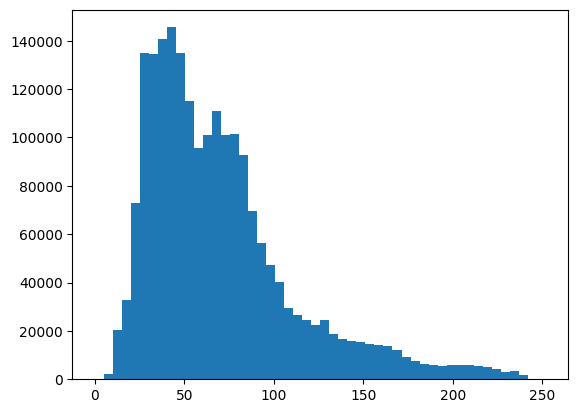

In [ ]:
# histograma
plt.hist(flat, bins=50)

In [ ]:
# formula para crear el histograma
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

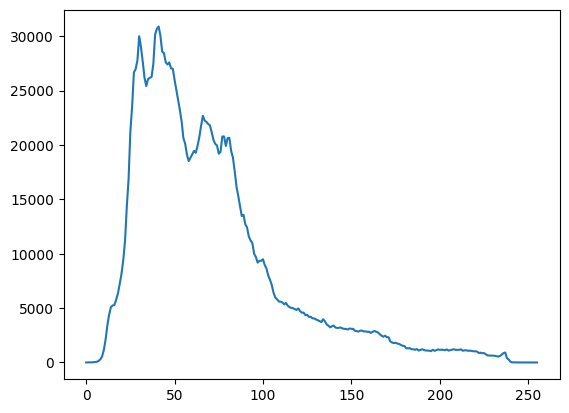

In [ ]:
# funcion para crear histograma
def get_histogram(image, bins):
    # arreglo de ceros, con el tamaño de los bins
    histogram = np.zeros(bins)

    # ciclo a través de los píxeles y la suma de los recuentos de píxeles
    for pixel in image:
        histogram[pixel] += 1

    # resultado final
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

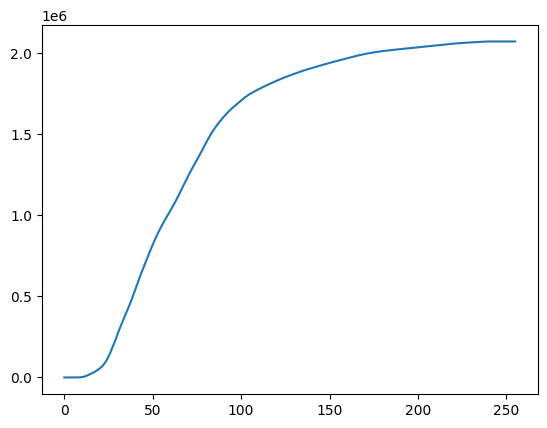

In [ ]:
# suma acumulativa
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)


cs = cumsum(hist)


plt.plot(cs)

In [ ]:
# formula para clacular la suma acumulativa
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

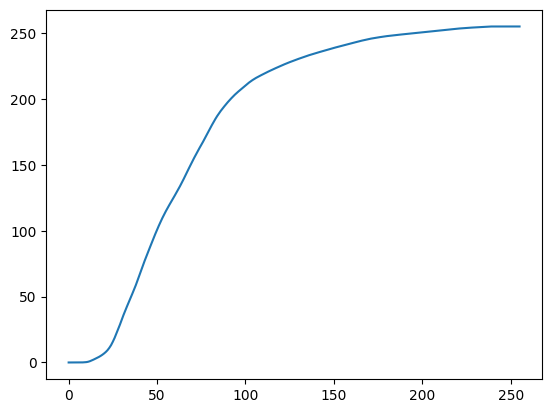

In [ ]:
# re-normalizar valores de la suma entre 0-255


nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()


cs = nj / N

plt.plot(cs)

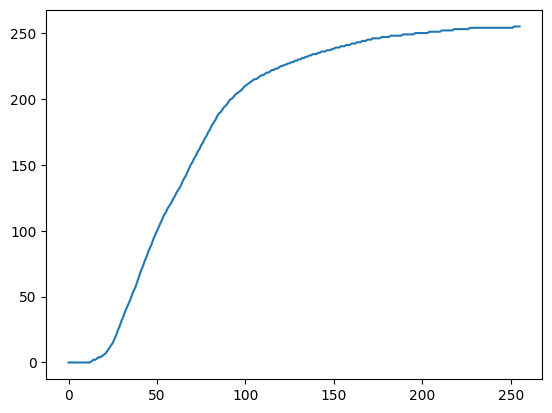

In [ ]:
# devolverlo a uint8 ya que no podemos utilizar valores de coma flotante en las imágenes
cs = cs.astype('uint8')

plt.plot(cs)

(array([47179., 28771., 52431., 23511., 53645., 27783., 59009., 27681.,
        51609., 26060., 52426., 27452., 60838., 30896., 30057., 57026.,
        27594., 54994., 27047., 53003., 49224., 45387., 40749., 37619.,
        37952., 38736., 40637., 44436., 44373., 43737., 41648., 40052.,
        38563., 41565., 40545., 40108., 36456., 45904., 39759., 46195.,
        47569., 42660., 41993., 40879., 44082., 39960., 40225., 41523.,
        40305., 41747.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

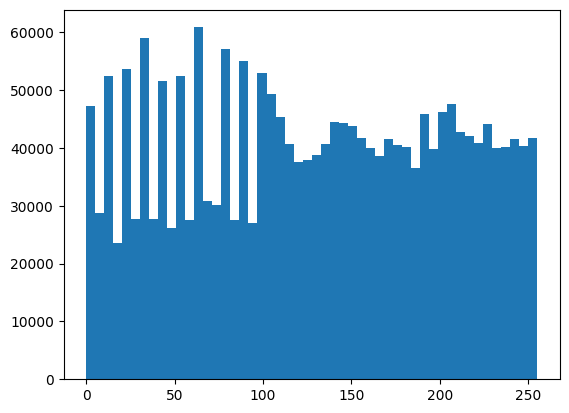

In [ ]:
# obtener el valor de la suma acumulativa para cada índice en plano, y establecer que como img_new
img_new = cs[flat]

# vemos un histograma mucho más uniformemente distribuido
plt.hist(img_new, bins=50)

In [ ]:
# devolver el array a su forma original ya que lo hemos aplanado
img_new = np.reshape(img_new, img.shape)
img_new

array([[ 94,  94,  94, ..., 121, 121, 121],
       [ 87,  87,  87, ..., 117, 117, 119],
       [ 94,  94,  94, ..., 112, 112, 114],
       ...,
       [103, 100, 100, ..., 112, 121, 126],
       [100,  97,  94, ..., 119, 124, 126],
       [ 94,  90,  87, ..., 131, 129, 131]], dtype=uint8)

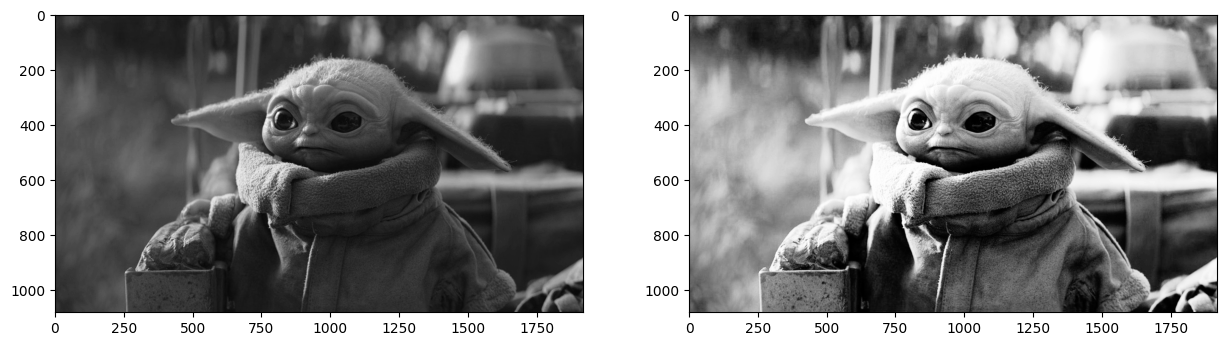

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')


fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

In [ ]:
##Usando las funciones de OpenCV
img = cv2.imread('/content/grogu.jpg',0)
equ = cv2.equalizeHist(img)

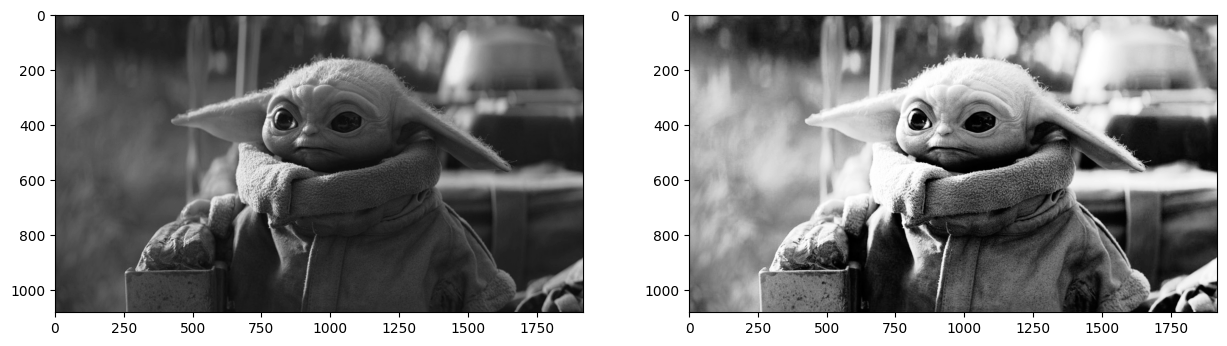

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')


fig.add_subplot(1,2,2)
plt.imshow(equ, cmap='gray')

plt.show(block=True)

##Histograma Local Binary Pattern

In [ ]:
import matplotlib.pyplot as plt
import cv2, os
import numpy as np
import seaborn as sns

In [ ]:
# Función para calcular LBP manualmente
def calculate_lbp(image):
    lbp_image = np.zeros_like(image, dtype=np.uint8)
    rows, cols = image.shape

    # Desplazamientos de los 8 vecinos alrededor de cada píxel
    neighbors = [
        (-1, -1), (-1, 0), (-1, 1),  # Vecinos superiores
        (0, -1),         (0, 1),      # Vecinos a la izquierda y derecha
        (1, -1), (1, 0), (1, 1)       # Vecinos inferiores
    ]

    for row in range(1, rows - 1):
        for col in range(1, cols - 1):
            center = image[row, col]
            binary_value = 0
            for i, (dx, dy) in enumerate(neighbors):
                neighbor = image[row + dx, col + dy]
                # Comparar vecino con el píxel central y generar el patrón binario
                binary_value |= (neighbor > center) << (7 - i)
            lbp_image[row, col] = binary_value

    return lbp_image

In [ ]:
# Cargar la imagen en escala de grises
image = cv2.imread('/content/grogu.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# Calcular el LBP
lbp_image = calculate_lbp(image)

# Calcular histograma
hist, bins = np.histogram(lbp_image.ravel(), bins=np.arange(0, 257), range=(0, 256))

In [ ]:
# Normalizar el histograma
hist = hist.astype('float')
hist /= (hist.sum() + 1e-6)  # Evitar división por cero

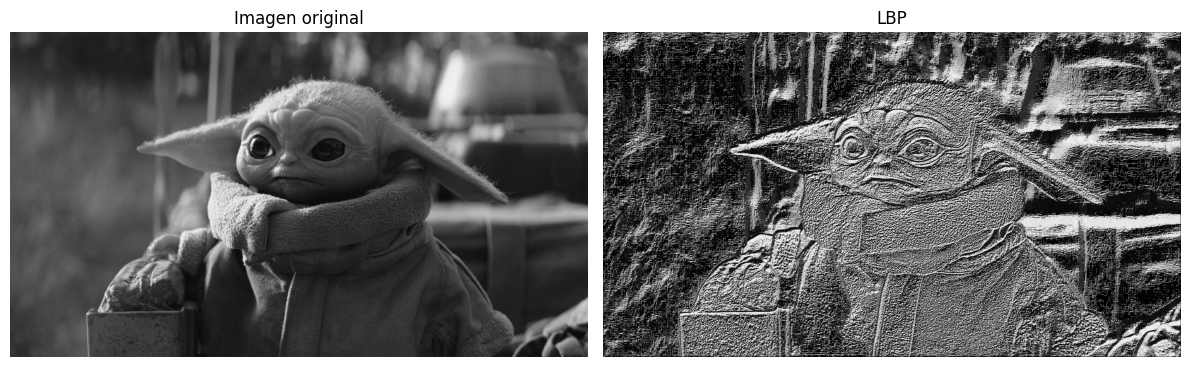

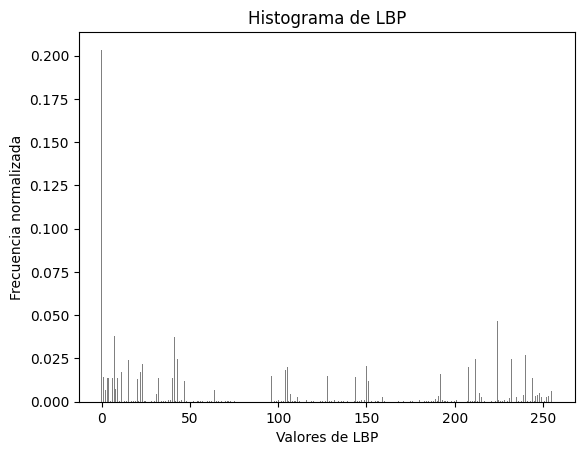

In [ ]:
# Mostrar la imagen original y su LBP
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title('LBP')
plt.axis('off')

plt.tight_layout()
plt.show()

# Mostrar el histograma
plt.figure()
plt.bar(bins[:-1], hist, width=0.5, color='gray')
plt.title('Histograma de LBP')
plt.xlabel('Valores de LBP')
plt.ylabel('Frecuencia normalizada')
plt.show()

##Harris Corner Detector

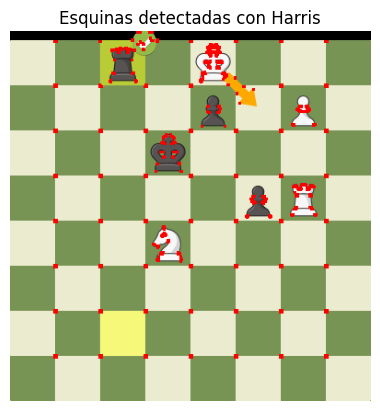

In [ ]:
# Cargar imagen en escala de grises
image = cv2.imread('/content/chess.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convertir a formato float32 para Harris
gray = np.float32(gray)

# Parámetros: blockSize, ksize (apertura del filtro Sobel), k (coeficiente libre en la ecuación de Harris)
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilatar los resultados para marcarlos mejor
harris_corners = cv2.dilate(harris_corners, None)

# Marcar las esquinas en la imagen original
image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Mostrar la imagen
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Esquinas detectadas con Harris')
plt.axis('off')
plt.show()

###Algoritmo SURF
SURF se encuentra bajo patente, en su lugar se encuentra ORB (Oriented FAST and Rotated BRIEF).
Detecta puntos de puntos claves FAST(Features from Accelerated Segment Test) y construye el descriptor BRIEF (Binary Robust Independent Elementary Feature).
FAST es un método de detección de esquinas, que permite extraer puntos de
características, que luego se utilizan para rastrear y mapear objetos, para cada pixel compara de manera rápida el brillo de ese pixel frente a 16 pixeles, los cuales forman un círculo alrededor del pixel p. Los pixeles en el círculo se clasifican en tres clases (más claras, más oscuras o similares), en caso de haber más de 8 pixeles más oscuros que p se selecciona como punto de clave.
Los puntos claves o puntos de interés de una imagen son los puntos más relevantes de la misma, que a pesar de realizar alguna transformación no van a
cambiar.
Una limitación de FAST es que no tiene un componente de orientación o característica multiescala. Así es que ORB usa la pirámide de imágenes multiescala, que es prácticamente la misma imagen en diferentes tamaños. Luego de detectar los puntos claves, ORB asigna una orientación a cada punto clave, según cómo cambien los niveles de intensidad alrededor del punto clave. BRIEF se construye seleccionando todos los puntos claves encontrados de la imagen por el algoritmo rápido FAST y los convierte en un vector de característica binario, definiendo de esta manera un objeto

In [1]:
!pip install opencv-contrib-python
import cv2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
imag = cv2.imread('/content/avenue.jpg', cv2.IMREAD_GRAYSCALE)

In [26]:
orb = cv2.ORB_create()

In [27]:
# Detectar keypoints y descriptores
keypoints, descriptors = orb.detectAndCompute(imag, None)

In [28]:
# Dibujar los keypoints en la imagen
img_keypoints = cv2.drawKeypoints(imag, keypoints, None, (255, 0, 0), 4)

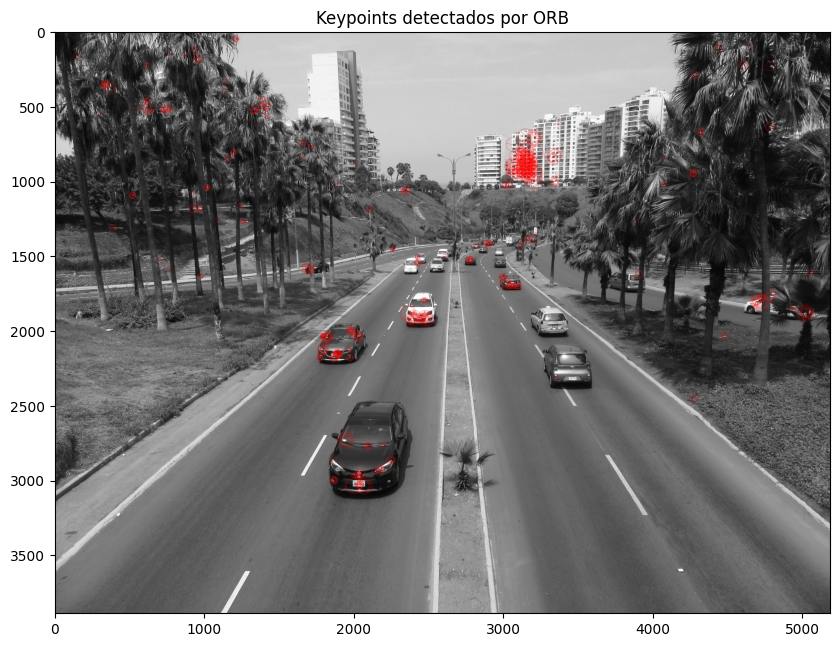

In [29]:
# Mostrar la imagen con keypoints
plt.figure(figsize=(10,10))
plt.imshow(img_keypoints, cmap='gray')
plt.title('Keypoints detectados por ORB')
plt.show()